In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pickle
X = pickle.load(open("/content/drive/MyDrive/MP sign language/Results/X.pkl", 'rb'))
Y = pickle.load(open("/content/drive/MyDrive/MP sign language/Results/Y.pkl", 'rb'))

In [ ]:
import pickle
#VARIABLE SEQUENCE
X = pickle.load(open("/content/drive/MyDrive/MP sign language/Results/X_var.pkl", 'rb'))
Y = pickle.load(open("/content/drive/MyDrive/MP sign language/Results/Y_var.pkl", 'rb'))

In [ ]:
s = X.shape

In [ ]:
maxim = 0
lens = []
for i in X:
  lens.append(i.shape[0])


In [ ]:
s

(18540, 50, 42, 3)

In [ ]:
X = X.reshape(s[0], s[1], -1)
X.shape

(18540, 50, 126)

In [ ]:
X[0][49]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0.])

In [ ]:
X[0][1]

array([0.96002394, 0.02424614, 0.65590809, 0.89413083, 0.14268699,
       0.25426165, 0.86951685, 0.3725755 , 0.16795882, 0.85718218,
       0.5752717 , 0.18672129, 0.84432479, 0.71298286, 0.24754752,
       0.97084968, 0.54544334, 0.30155699, 0.93271347, 0.82000735,
       0.2667453 , 0.88391128, 0.8792046 , 0.27081119, 0.84436758,
       0.87774384, 0.29879847, 0.99542148, 0.54362812, 0.55497801,
       0.94365292, 0.7883051 , 0.52103477, 0.88935991, 0.82395035,
       0.50411575, 0.84612275, 0.8056118 , 0.50932532, 1.        ,
       0.52715114, 0.79110935, 0.94757467, 0.72474432, 0.75675741,
       0.89929551, 0.75860541, 0.69438729, 0.85946935, 0.74629771,
       0.66457071, 0.9927594 , 0.50762298, 1.        , 0.95146381,
       0.65382357, 0.95631104, 0.91290751, 0.69122685, 0.89857924,
       0.87888723, 0.68738689, 0.8791704 , 0.02601204, 0.        ,
       0.6559036 , 0.09440745, 0.08881954, 0.2621189 , 0.13013637,
       0.2657206 , 0.1015107 , 0.1511079 , 0.47626978, 0.03117

In [ ]:
from keras.models import Model

from keras.models import Sequential
from keras.layers import Dense , Dropout , Lambda, Flatten, LSTM, Input, Embedding,CuDNNLSTM, TimeDistributed
from keras.layers import BatchNormalization
# from keras.optimizers import Adam ,RMSprop
# from keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from keras import  backend as K
from keras.utils.np_utils import to_categorical


from keras.callbacks import EarlyStopping, TensorBoard, ModelCheckpoint
from keras.layers import BatchNormalization , MaxPooling2D, Activation

In [ ]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(Y)
Y_cat = to_categorical(integer_encoded)



In [ ]:
Y_cat.shape

(18540, 49)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y_cat, test_size=0.2, random_state = 42)

In [ ]:
X_train.shape

(14832, 50, 126)

In [ ]:
bottleneck = Sequential()
bottleneck.add(Dense(64, input_dim=126, activation='relu'))
bottleneck.add(Dense(16, activation='relu'))
bottleneck.add(Dense(257, activation='softmax'))

In [ ]:
bottleneck.load_weights("/content/drive/MyDrive/MP sign language/Results/<keras.engine.sequential.Sequential object at 0x7f6d90bbdf90>_weights.best.hdf5")

In [ ]:
feature_extractor = Sequential()
for layer in bottleneck.layers[:-1]:
  layer.trainable = False
  feature_extractor.add(layer)
feature_extractor.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                8128      
                                                                 
 dense_1 (Dense)             (None, 16)                1040      
                                                                 
Total params: 9,168
Trainable params: 0
Non-trainable params: 9,168
_________________________________________________________________


In [ ]:
LR = 1e-2
inp = Input(shape = (None, 126))
# inp = Input(batch_shape = (1, None, X.shape[2]))

lstm1 = LSTM(128, dropout=0.2, return_sequences = True)
lstmin =lstm1(inp)
lstm2 = LSTM(128, dropout=0.2)
lstmout = lstm2(lstmin)
# lstmout = LSTM(64, )(lstmout)
dense = Dense(Y_cat.shape[1] ,activation = "softmax")
out = dense(lstmout)
model = Model(inp, out)

In [ ]:
LR = 1e-2
# inp = Input(shape = (None, X.shape[2]))
inp = Input(batch_shape = (1, None, X.shape[2]))

lstm1 = LSTM(128, dropout=0.2, return_sequences = True, stateful = True)
lstmin =lstm1(inp)
lstm2 = LSTM(128, dropout=0.2, stateful= True)
lstmout = lstm2(lstmin)
# lstmout = LSTM(64, )(lstmout)
dense = Dense(Y_cat.shape[1] ,activation = "softmax")
out = dense(lstmout)
model = Model(inp, out)

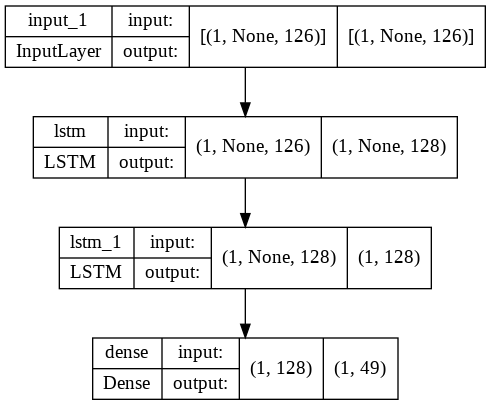

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.load_weights("/content/drive/MyDrive/MP sign language/Results/lstm_weights.best.hdf5")

In [ ]:
LstmModel = Model(inp, lstmout)
LstmModel.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(1, None, 126)]          0         
                                                                 
 lstm (LSTM)                 (1, None, 128)            130560    
                                                                 
 lstm_1 (LSTM)               (1, 128)                  131584    
                                                                 
Total params: 262,144
Trainable params: 262,144
Non-trainable params: 0
_________________________________________________________________


In [ ]:
softModel = Model(lstmout, out)
softModel.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(1, 128)]                0         
                                                                 
 dense (Dense)               (1, 49)                   6321      
                                                                 
Total params: 6,321
Trainable params: 6,321
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import numpy as np
model.reset_states()

LstmModel.predict(np.expand_dims(X_train[0], axis = 0))

array([[-0.97910184, -0.9947712 , -0.6865224 ,  0.9741889 , -0.9426733 ,
        -0.5844806 , -0.99834025,  0.99482423, -0.9942836 ,  0.01862373,
        -0.50457525, -0.9859213 , -0.99596924,  0.9877906 , -0.97921807,
         0.9958124 , -0.88291156,  0.68196964, -0.6951597 , -0.95174146,
         0.9102523 ,  0.99411654,  0.9996319 ,  0.19229041,  0.986682  ,
        -0.97826016, -0.9967203 , -0.7338856 ,  0.96719366,  0.65358126,
         0.88582563, -0.20846103,  0.9849625 , -0.9914859 ,  0.17345029,
        -0.9893387 ,  0.9987362 , -0.99888426,  0.9051188 ,  0.74531156,
         0.9990672 , -0.9869952 ,  0.9969561 , -0.9983985 , -0.70975685,
         0.9895109 ,  0.90908533,  0.9946432 ,  0.96828735, -0.42378247,
        -0.9951941 , -0.9997598 ,  0.8355798 , -0.98142815, -0.99685305,
        -0.9989813 ,  0.34743482,  0.9977869 , -0.88710546, -0.59577614,
        -0.99791884, -0.9544763 , -0.99991065, -0.4139804 , -0.86786705,
        -0.86443853, -0.9325151 ,  0.99041414, -0.9

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(1, None, 126)]          0         
                                                                 
 lstm_2 (LSTM)               (1, None, 128)            130560    
                                                                 
 lstm_3 (LSTM)               (1, 128)                  131584    
                                                                 
 dense_1 (Dense)             (1, 49)                   6321      
                                                                 
Total params: 268,465
Trainable params: 268,465
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau
Patience=2
BestModelWeightsPath = "/content/drive/MyDrive/MP sign language/Results/lstm_weights.best.hdf5"
checkpoint = ModelCheckpoint(
    BestModelWeightsPath, 
    monitor='val_accuracy', 
    verbose=1, 
    save_best_only=True, 
    mode='max', 
    save_weights_only = True
)
reduceLROnPlat = ReduceLROnPlateau(
    monitor='val_accuracy', 
    factor=0.8, 
    patience=10, 
    verbose=1, 
    mode='max', 
    cooldown=2, 
    min_lr=1e-8
)
early = EarlyStopping(
    monitor="val_accuracy", 
    mode="max", 
    patience=Patience*4,
    restore_best_weights=True
)
callbacks_list= [checkpoint, reduceLROnPlat, early]


In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, None, 126)]       0         
                                                                 
 lstm_4 (LSTM)               (None, None, 128)         130560    
                                                                 
 lstm_5 (LSTM)               (None, 128)               131584    
                                                                 
 dense_2 (Dense)             (None, 49)                6321      
                                                                 
Total params: 268,465
Trainable params: 268,465
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.losses import categorical_crossentropy
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])
model.optimizer.lr = 1e-3

In [ ]:
history_CNN=model.fit(
  X_train,
  y_train,
  batch_size = 128,
  steps_per_epoch = len(X_train)/128,
  epochs = 1000,
  callbacks = callbacks_list,
  validation_data = (X_test, y_test),
)

Epoch 1/1000
116/115 [==============================] - ETA: 0s - loss: 3.0770 - accuracy: 0.1472
Epoch 1: val_accuracy improved from -inf to 0.27131, saving model to /content/drive/MyDrive/MP sign language/Results/lstm_weights.best.hdf5
115/115 [==============================] - 11s 24ms/step - loss: 3.0770 - accuracy: 0.1472 - val_loss: 2.3632 - val_accuracy: 0.2713 - lr: 0.0010
Epoch 2/1000
114/115 [============================>.] - ETA: 0s - loss: 2.0227 - accuracy: 0.3764
Epoch 2: val_accuracy improved from 0.27131 to 0.49569, saving model to /content/drive/MyDrive/MP sign language/Results/lstm_weights.best.hdf5
115/115 [==============================] - 2s 15ms/step - loss: 2.0139 - accuracy: 0.3788 - val_loss: 1.5515 - val_accuracy: 0.4957 - lr: 0.0010
Epoch 3/1000
112/115 [===========================>..] - ETA: 0s - loss: 1.3964 - accuracy: 0.5581
Epoch 3: val_accuracy improved from 0.49569 to 0.67691, saving model to /content/drive/MyDrive/MP sign language/Results/lstm_weights

In [ ]:
import numpy as np
print(np.argmax(model.predict(X_test), axis = 1))

[24 47 32 ... 34 44  4]


Inference


In [ ]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(Y)
Y_cat = to_categorical(integer_encoded)
Y_cat.shape

(18540, 49)

In [ ]:
mapping = dict(zip(range(len(label_encoder.classes_)), label_encoder.classes_,))
mapping

{0: 'Adult',
 1: 'Alright',
 2: 'Baby',
 3: 'Boy',
 4: 'Brother',
 5: 'Child',
 6: 'Crowd',
 7: 'Daughter',
 8: 'Family',
 9: 'Father',
 10: 'Friday',
 11: 'Friend',
 12: 'Girl',
 13: 'Grandfather',
 14: 'Grandmother',
 15: 'Hello',
 16: 'Husband',
 17: 'I',
 18: 'King',
 19: 'Man',
 20: 'Monday',
 21: 'Month',
 22: 'Mother',
 23: 'Neighbour',
 24: 'Parent',
 25: 'Player',
 26: 'Pleased',
 27: 'President',
 28: 'Queen',
 29: 'Saturday',
 30: 'Sister',
 31: 'Son',
 32: 'Sunday',
 33: 'Thursday',
 34: 'Today',
 35: 'Tomorrow',
 36: 'Tuesday',
 37: 'Wednesday',
 38: 'Week',
 39: 'Wife',
 40: 'Woman',
 41: 'Year',
 42: 'Yesterday',
 43: 'he',
 44: 'it',
 45: 'she',
 46: 'they',
 47: 'we',
 48: 'you'}

In [ ]:
import numpy as np
model.reset_states()
y_pred = np.argmax(model.predict(X_test), axis=1)

In [ ]:
y_pred

In [ ]:
y_true = np.argmax(y_test, axis = 1)
y_true

In [ ]:
for i, j in zip(y_true, y_pred):
  print(i,j) 

Mean Absolute Error: 0.02900461437046803
Accuracy: 0.9976928147659855
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        57
           1      0.987     1.000     0.993        74
           2      1.000     1.000     1.000       101
           3      1.000     1.000     1.000        72
           4      1.000     1.000     1.000        79
           5      1.000     1.000     1.000        42
           6      0.988     1.000     0.994        83
           7      1.000     1.000     1.000        60
           8      1.000     1.000     1.000        70
           9      1.000     1.000     1.000        59
          10      1.000     1.000     1.000        92
          11      0.987     1.000     0.994        77
          12      1.000     1.000     1.000        82
          13      1.000     1.000     1.000        69
          14      1.000     1.000     1.000        80
          15      1.000     1.000     1.000        62
          1

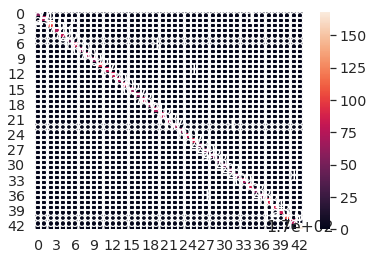

<Figure size 1440x1440 with 0 Axes>

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline


print('Mean Absolute Error:', metrics.mean_absolute_error(y_true, y_pred))
print('Accuracy: %s' % metrics.accuracy_score(y_true, y_pred))
print(metrics.classification_report(y_true, y_pred, digits=3))
cm = metrics.confusion_matrix(y_pred, y_true)
sb.set(font_scale=1.3)
sb.heatmap(cm, annot=True)
plt.figure(figsize=(20,20))
plt.show() # 0: died, 1: euthanized, 2: lived

PipeLine

In [ ]:
!pip install mediapipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 32.8 MB 1.3 MB/s 


In [ ]:
import mediapipe as mp
import time
 
ROOT = "/content/drive/MyDrive/MP sign language"

class handDetector():
    def __init__(self, mode=False, maxHands=2,modelC=1, detectionCon=0.5, trackCon=0.5):
        self.mode = mode
        self.maxHands = maxHands
        self.detectionCon = detectionCon
        self.trackCon = trackCon
        self.modelC = modelC
        self.mpHands = mp.solutions.hands
        self.hands = self.mpHands.Hands(self.mode, self.maxHands,self.modelC,
                                        self.detectionCon, self.trackCon)
        self.mpDraw = mp.solutions.drawing_utils
 
    def findHands(self, img, draw=True):
        imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        self.results = self.hands.process(imgRGB)
        # print(self.results.multi_hand_landmarks)
        # print(len(self.results.multi_hand_landmarks))
        # if self.results.multi_hand_landmarks:
        #     for handLms in self.results.multi_hand_landmarks:
        #         # print("hand", handLms)
        #         if draw:
        #             self.mpDraw.draw_landmarks(img, handLms,)
                                              #  self.mpHands.HAND_CONNECTIONS)
                    
        return img,self.results.multi_hand_landmarks 
 
    def findPosition(self, img, handNo=0, draw=True):
 
        lmList = []
        if self.results.multi_hand_landmarks:
            myHand = self.results.multi_hand_landmarks[0]
            for id, lm in enumerate(myHand.landmark):
                # print(id, lm)
                h, w, c = img.shape
                cx, cy = int(lm.x * w), int(lm.y * h)
                # print(id, cx, cy)
                lmList.append([id, cx, cy])
                if draw:
                    cv2.circle(img, (cx, cy), 2, (255, 0, 0), cv2.FILLED)
            # myHand = self.results.multi_hand_landmarks[1]
            # for id, lm in enumerate(myHand.landmark):
            #     # print(id, lm)
            #     h, w, c = img.shape
            #     cx, cy = int(lm.x * w), int(lm.y * h)
            #     # print(id, cx, cy)
            #     lmList.append([id, cx, cy])
            #     if draw:
            #         cv2.circle(img, (cx, cy), 2, (0, 0, 255), cv2.FILLED)
 
        return lmList

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import time, numpy as np
detector = handDetector()
vidcap = cv2.VideoCapture("/content/drive/MyDrive/MP sign language/ISL/Greetings/48. Hello/MVI_0030.MOV")
success,image = vidcap.read()

LstmModel.reset_states()
count = 0
frames = []
start = time.time()
while success:
  count+=1
  # print("hi")
  # frames.append(image)   # save frame as JPEG file     
  image, lms = detector.findHands(image)
  if lms:
    hand_points = []
    for hands in lms:
      # keypoints= []
      for data_point in hands.landmark:
        hand_points.append([
              data_point.x,
              data_point.y,
              data_point.z,
              ])
      # hand_points.append(keypoints)
    if len(lms) == 1:
        temp_key = [[0,0,0]]*21
        # print("tempppppp: ",temp_key)
        hand_points = hand_points + temp_key
    
    hand_points = np.array(hand_points[:42])
    rng = hand_points.max(axis = 0).reshape(-1, hand_points.shape[1]) - hand_points.min(axis = 0).reshape(-1, hand_points.shape[1])
    mini = hand_points.min(axis = 0).reshape(-1, hand_points.shape[1])
    # print(rng.shape)
    hand_points = (hand_points - mini)/rng
    hand_points[np.isnan(hand_points)] = 0
    # print(hand_points.shape)
    # hand_points = hand_points.reshape(1, -1)
    hand_points = hand_points.reshape(1,-1)
    # ls_out = LstmModel.predict(np.array([hand_points]))

    ls_out = LstmModel.predict(np.expand_dims(hand_points, axis = 0))
    # frames.append(hand_points)
    pred = softModel.predict(ls_out)

# print(f"time taken : {time.time() - start}")
    
  success,image = vidcap.read()

print(f"Predicted : {mapping[np.argmax(pred)]}, {pred[0][np.argmax(pred)]}")
  # if count==15:
  #   print("Actual Word: Brother")

  #   cv2_imshow(image)

  # # print('Read a new frame: ', success)
  # count += 1
  

# for i in range(count, 109):
#   hand_points = np.zeros((126))
#   frames.append(hand_points)

# print(np.array(frames))

print(time.time() - start, count )
# model.reset_states()

# print(f"Predicted : {mapping[np.argmax(model.predict(np.array([frames])))]}")


Predicted : Hello, 0.9998636245727539
11.062387466430664 74


In [ ]:
import numpy as np
class SentencePredictor:
  def __init__(self, model, detector):
    self.model = model
    self.detector = detector
    self.predCount = 0
    self.currPred = ""
    self.isPred = False
    # self.frameCount = 0
    self.frames = []
  
  def predict(self, image):
    image, lms = detector.findHands(image)
    if lms:
      hand_points = []
      for hands in lms:
        # keypoints= []
        for data_point in hands.landmark:
          hand_points.append([
                data_point.x,
                data_point.y,
                data_point.z,
                ])
        # hand_points.append(keypoints)
      if len(lms) == 1:
          temp_key = [[0,0,0]]*21
          # print("tempppppp: ",temp_key)
          hand_points = hand_points + temp_key
      hand_points = np.array(hand_points)
      rng = hand_points.max(axis = 0).reshape(-1, hand_points.shape[1]) - hand_points.min(axis = 0).reshape(-1, hand_points.shape[1])
      mini = hand_points.min(axis = 0).reshape(-1, hand_points.shape[1])
      # print(rng.shape)
      hand_points = (hand_points - mini)/rng
      hand_points[np.isnan(hand_points)] = 0
      self.frames.append(hand_points)



      if len(self.frames) > 20:
        # print(len(self.frames))
        if len(self.frames) > 109:
          self.frames.pop(0)
        frames = list(self.frames)
        for j in range(len(frames), X.shape[1]):
          frames.append(np.array([[0,0,0]]*42))

        frames = np.array(frames)
        frames = np.expand_dims(frames, axis = 0)
        frames = frames.reshape(frames.shape[0], frames.shape[1], -1)
        model.reset_states()
        pred = model.predict(frames)
        # print(pred[0][np.argmax(pred)])
        # print(mapping[np.argmax(pred)])

        if self.isPred:
          if mapping[np.argmax(pred)] == self.currPred:
            self.predCount +=1
            if self.predCount >= 25:
              self.frames = [hand_points]
              self.isPred = False
              self.predCount = 0 
          else:
            self.frames = [hand_points]
            self.isPred = False
            self.predCount = 0

        else:
          if mapping[np.argmax(pred)] == self.currPred:
            self.predCount +=1

          elif pred[0][np.argmax(pred)] >= 0.8:
            self.currPred = mapping[np.argmax(pred)]
            self.predCount = 0

          if self.predCount == 15 and ~self.isPred:
            # print("Found")
            # print("*********************")
            # print(pred[0][np.argmax(pred)])
            print("Word Found:  ", mapping[np.argmax(pred)])
            # self.frames = []
            self.isPred = True
            # self.predCount = 0
            
            return mapping[np.argmax(pred)]
        # print("here")
        # print(pred[0][np.argmax(pred)])
        # print(mapping[np.argmax(pred)])
        
      # print()  


In [ ]:
import numpy as np
class SentencePredictor:
  def __init__(self, LstmModel, softModel, detector):
    self.LstmModel = LstmModel
    self.softModel = softModel
    self.detector = detector
    self.predCount = 0
    self.currPred = ""
    self.isPred = False
    self.frameCount = 0
    
  
  def predict(self, image):
    image, lms = detector.findHands(image)
    if lms:
      hand_points = []
      for hands in lms:
        # keypoints= []
        for data_point in hands.landmark:
          hand_points.append([
                data_point.x,
                data_point.y,
                data_point.z,
                ])
        # hand_points.append(keypoints)
      if len(lms) == 1:
          temp_key = [[0,0,0]]*21
          # print("tempppppp: ",temp_key)
          hand_points = hand_points + temp_key
      hand_points = np.array(hand_points[0:42])
      rng = hand_points.max(axis = 0).reshape(-1, hand_points.shape[1]) - hand_points.min(axis = 0).reshape(-1, hand_points.shape[1])
      mini = hand_points.min(axis = 0).reshape(-1, hand_points.shape[1])
      # print(rng.shape)
      hand_points = (hand_points - mini)/rng
      hand_points[np.isnan(hand_points)] = 0
      # print(hand_points.shape)
      # hand_points = hand_points.reshape(1, -1)
      hand_points = hand_points.reshape(1,-1)
      # ls_out = LstmModel.predict(np.array([hand_points]))

      ls_out = LstmModel.predict(np.expand_dims(hand_points, axis = 0))
    
      self.frameCount+= 1

      if self.frameCount >= 20:
        pred = self.softModel.predict(ls_out)
        # print(mapping[np.argmax(pred)], pred[0][np.argmax(pred)], self.frameCount)
        if mapping[np.argmax(pred)] == self.currPred:
            self.predCount +=1

        elif pred[0][np.argmax(pred)] >= 0.7:
          self.currPred = mapping[np.argmax(pred)]
          self.predCount = 0

        if self.predCount == 5:
          # print("Found")
          # print("*********************")
          # print(pred[0][np.argmax(pred)])
          print("Word Found:  ", mapping[np.argmax(pred)])
          # self.frames = []
          self.predCount = 0
          self.frameCount = 0
          self.LstmModel.reset_states()

          # self.predCount = 0
          
          return mapping[np.argmax(pred)]


      
      

In [ ]:
import cv2
model.reset_states()
predictor = SentencePredictor(LstmModel, softModel,handDetector())
vidList = [
          #  "/content/drive/MyDrive/MP sign language/ISL/Days_and_Time/73. Today/MVI_5470.MOV",
          "/content/drive/MyDrive/MP sign language/ISL/Pronouns/40. I/MVI_9957.MOV",
          "/content/drive/MyDrive/MP sign language/ISL/Greetings/50. Alright/MVI_0043.MOV"
          #  "/content/drive/MyDrive/MP sign language/ISL/Greetings/48. Hello/MVI_0031.MOV",
          #  "/content/drive/MyDrive/MP sign language/ISL/Pronouns/40. I/MVI_9957.MOV",
          #  "/content/drive/MyDrive/MP sign language/ISL/Greetings/50. Alright/MVI_0043.MOV"
           
]
phrase = ""
start = time.time()

for vid in vidList:
  vidcap = cv2.VideoCapture(vid)
  success, image = vidcap.read()
  count = 0
  
  while success:
    # print(count)
    count += 1
    ret = predictor.predict(image)
    if ret != None:
      phrase += ret + " "
    success,image = vidcap.read()
# print("********************************************************")
# vidcap = cv2.VideoCapture("/content/drive/MyDrive/MP sign language/ISL/People/58. Son/MVI_5219.MOV")
# success, image = vidcap.read()
# while success:
#   print(count)
#   count += 1
#   ret = predictor.predict(image)
#   if ret != None:
#     phrase += ret + " "
#   success,image = vidcap.read()


print(f"The predicted wordset is :    {phrase}")

print(time.time() - start)


# para_phrases = parrot.augment(input_phrase=phrase, use_gpu=False)
# for para_phrase in para_phrases:
#   print("paraphrased sentence is:   ", para_phrase[0])
# frames = predictor.frames
# for j in range(len(frames), X.shape[1]):
#   frames.append(np.array([[0,0,0]]*42))
 
# frames = np.array(frames)
# frames = np.expand_dims(frames, axis = 0)
# frames = frames.reshape(frames.shape[0], frames.shape[1], -1)

# print(f"time taken : {time.time() - start}")
# print(f"prediction : {mapping[np.argmax(model.predict(frames))]}")

Word Found:   I
Word Found:   Alright
Word Found:   Alright
The predicted wordset is :    I Alright Alright 
13.710983991622925
